In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Labelling for all municipalities

In [2]:
dengue =pd.read_csv('1029_Municipalities_cases.csv') #this is the original dataset having the cases for all municipalities
dengue.head()

,epiweek,Cases,Municipality code,Municipality
0,2016/w01,235,5001,Medellín
1,2016/w02,274,5001,Medellín
2,2016/w03,252,5001,Medellín
3,2016/w04,262,5001,Medellín
4,2016/w05,274,5001,Medellín


In [3]:
dengue.columns = map(str.strip, dengue.columns)# To drop the Unnamed:0, it was not showing up in crop command. hence used this to show it up.
dengue.columns #see the column names

Index(['epiweek', 'Cases', 'Municipality code', 'Municipality'], dtype='object')

In [4]:
dengue_drp_1=dengue

In [5]:
dengue_drp_1.describe()

,Cases,Municipality code
count,160524.000000,160524.000000
mean,1.010061,37535.970845
std,11.000234,25949.898558
min,0.000000,5001.000000
25%,0.000000,15580.000000
50%,0.000000,25645.000000
75%,0.000000,66440.000000
max,839.000000,99773.000000


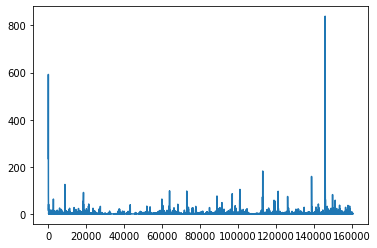

In [9]:
x = dengue_drp_1["Cases"] #see the case distribution and plot it
#print(x)
arr = np.array(x)
#arr_date = np.array(data["LastDayWeek"])

#plt.plot(arr_date,arr)
plt.plot(arr)

# making new column with the case differences

In [10]:
list=[]
for i in range(0,160524):
    k=1
    cases_difference=dengue_drp_1.iat[i,k] - dengue_drp_1.iat[i-1,k]
    list.append(cases_difference)
    #print(cases_difference)
#print(list)
for j in range(0,1029):
    list[j*156]=0   #making the first row of case difference for each municipality as zero because we do not know the previous week's case number to get the difference for first week
#print(list)

In [11]:
dengue_drp_1["cases_differences"]=list

In [12]:
dengue_drp_1_inc = dengue_drp_1[(dengue_drp_1['cases_differences']>0)]

In [13]:
dengue_drp_1_dec = dengue_drp_1[(dengue_drp_1['cases_differences']<0)]

In [14]:
dengue_drp_1_nochange = dengue_drp_1[(dengue_drp_1['cases_differences']==0)]

In [15]:
dengue_drp_1_inc['cases_intensity'] = "Increased" #giving the label's name
dengue_drp_1_dec['cases_intensity'] = "Decreased"
dengue_drp_1_nochange['cases_intensity'] = "No Change"

/home/jupyter-apadoo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jupyter-apadoo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyter-apadoo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [16]:
label_df=dengue_drp_1_inc.append(dengue_drp_1_dec, ignore_index=False, verify_integrity=False, sort=False).append(dengue_drp_1_nochange, ignore_index=False, verify_integrity=False, sort=False).sort_index()
label_df.head()

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity
0,2016/w01,235,5001,Medellín,0,No Change
1,2016/w02,274,5001,Medellín,39,Increased
2,2016/w03,252,5001,Medellín,-22,Decreased
3,2016/w04,262,5001,Medellín,10,Increased
4,2016/w05,274,5001,Medellín,12,Increased


# Making individual functions for each municipality and getting the stable or unstable labels

In [187]:
x = label_df["cases_differences"]
label_df["cases_diff_abs"]=abs(x)
label_df["Stability Label"]=pd.NaT
for i in range(1,1030):
    list_diff=[]
    for j in range(((i*156)-155),i*156):
        list_diff.append(label_df.iat[j-1,4])
    bar_for_stablity= round(max(abs(max(list_diff)),abs(min(list_diff)))*0.15) #15% of the highest number cases difference as the bar
    print("bar for stability for Municipality",label_df.iat[((i-1)*156),3],"is",bar_for_stablity)
    for k in range(((i*156)-155),(i*156)+1):
        if label_df.iat[k-1,6]>bar_for_stablity:
            label_df.iat[k-1,7]='Unstable'
        else:
            label_df.iat[k-1,7]='Stable'

label_df.head(1000)

bar for stability for Municipality Medellín is 14
bar for stability for Municipality Abejorral is 0
bar for stability for Municipality Abriaquí is 0
bar for stability for Municipality Alejandría is 0
bar for stability for Municipality Amagá is 1
bar for stability for Municipality Amalfi is 0
bar for stability for Municipality Andes is 1
bar for stability for Municipality Angelópolis is 0
bar for stability for Municipality Angostura is 0
bar for stability for Municipality Anorí is 0
bar for stability for Municipality Anzá is 0
bar for stability for Municipality Apartadó is 1
bar for stability for Municipality Arboletes is 1
bar for stability for Municipality Argelia is 0
bar for stability for Municipality Armenia is 0
bar for stability for Municipality Barbosa is 1
bar for stability for Municipality Belmira is 0
bar for stability for Municipality Bello is 4
bar for stability for Municipality Betania is 1
bar for stability for Municipality Betulia is 1
bar for stability for Municipality 

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable
5,2016/w06,266,5001,Medellín,-8,Decreased,8,Stable
6,2016/w07,234,5001,Medellín,-32,Decreased,32,Unstable
7,2016/w08,258,5001,Medellín,24,Increased,24,Unstable
8,2016/w09,272,5001,Medellín,14,Increased,14,Stable
9,2016/w10,189,5001,Medellín,-83,Decreased,83,Unstable


In [189]:
#del label_df_1["final_cases_labe'"]
label_df["final_cases_label"]=pd.NaT
label_df.head()

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,NaT
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,NaT
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,NaT
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,NaT
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,NaT


In [193]:
for i in range(0,160524):
    if label_df.iat[i,7]=='Stable':
        label_df.iat[i,8]='Stable'
    else:
        label_df.iat[i,8]=label_df.iat[i,5]
label_df.head(1000)

,epiweek,Cases,Municipality code,Municipality,cases_differences,cases_intensity,cases_diff_abs,Stability Label,final_cases_label
0,2016/w01,235,5001,Medellín,0,No Change,0,Stable,Stable
1,2016/w02,274,5001,Medellín,39,Increased,39,Unstable,Increased
2,2016/w03,252,5001,Medellín,-22,Decreased,22,Unstable,Decreased
3,2016/w04,262,5001,Medellín,10,Increased,10,Stable,Stable
4,2016/w05,274,5001,Medellín,12,Increased,12,Stable,Stable
5,2016/w06,266,5001,Medellín,-8,Decreased,8,Stable,Stable
6,2016/w07,234,5001,Medellín,-32,Decreased,32,Unstable,Decreased
7,2016/w08,258,5001,Medellín,24,Increased,24,Unstable,Increased
8,2016/w09,272,5001,Medellín,14,Increased,14,Stable,Stable
9,2016/w10,189,5001,Medellín,-83,Decreased,83,Unstable,Decreased


In [192]:
label_df.to_csv('Label_CSV.csv')